Visualización de relaciones estadísticas con Line Plots
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Series de tiempo

In [2]:
sutter = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/sutter.csv",
)

#
# La columna time es leida como texto
# y no como fecha
#
display(
    sutter.head(),
    sutter.dtypes
)

time  value
0  1946-01-01    890
1  1946-02-01    992
2  1946-03-01    979
3  1946-04-01    959
4  1946-05-01   1110

time     object
value     int64
dtype: object

In [3]:
#
# Conversión de la la columna a datetime
#
sutter['time'] =  pd.to_datetime(sutter['time'], format='%Y-%m-%d')
display(
    sutter.head(),
    sutter.dtypes
)

time  value
0 1946-01-01    890
1 1946-02-01    992
2 1946-03-01    979
3 1946-04-01    959
4 1946-05-01   1110

time     datetime64[ns]
value             int64
dtype: object

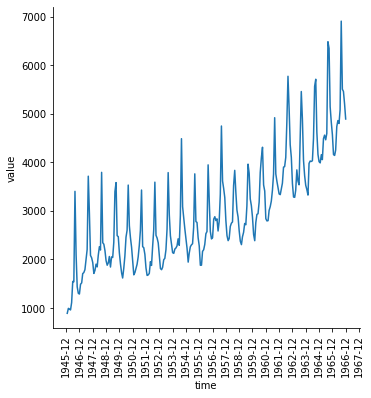

In [4]:
#
# Gráfico de la serie de tiempo
#
import matplotlib.dates as mdates

sns.relplot(
    x="time",
    y="value",
    kind="line",
    data=sutter,
)

fmt_year = mdates.MonthLocator(interval=12)
plt.gca().xaxis.set_major_locator(fmt_year)
plt.gca().tick_params(axis="x", rotation=90)
plt.show()

## Agregación y representación de la incertidumbre

In [5]:
fmri = sns.load_dataset("fmri")

display(
    fmri.head(),
    fmri.size
)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

5320

In [6]:
#
# Exisen diferentes medidas para cada sujeto,
# timepoint, .....
#
fmri[fmri.timepoint == 18].head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513

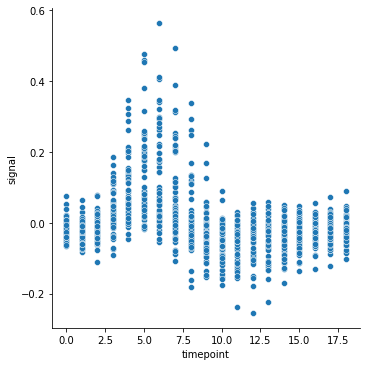

In [7]:
#
# Gráfica por defecto mostrando los datos
#
sns.relplot(
    x="timepoint",
    y="signal",
    data=fmri,
)
plt.show()

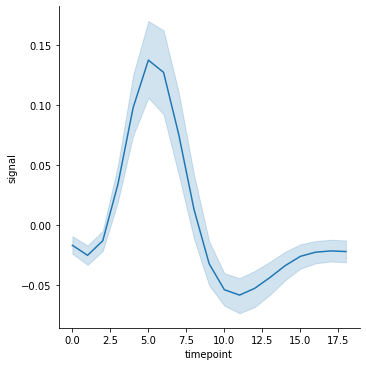

In [8]:
#
# Representación de la incertidumbre
# ===============================================
# Usa por defecto los intervalos de confianza del
# 95%
#
sns.relplot(
    x="timepoint",
    y="signal",
    kind="line",
    data=fmri,
)
plt.show()

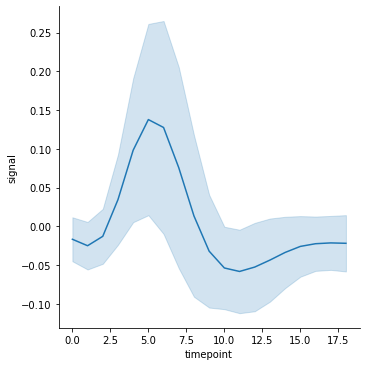

In [9]:
#
# Reemplazo de los ci por desviaciones estándar
#
sns.relplot(
    x="timepoint",
    y="signal",
    kind="line",
    ci="sd",
    data=fmri,
)
plt.show()

## Graficación por subgrupos

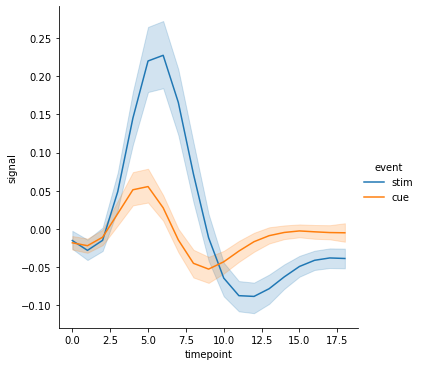

In [10]:
#
# Separación por clases usando colores.
#
sns.relplot(
    x="timepoint",
    y="signal",
    hue="event",
    kind="line",
    data=fmri,
)
plt.show()

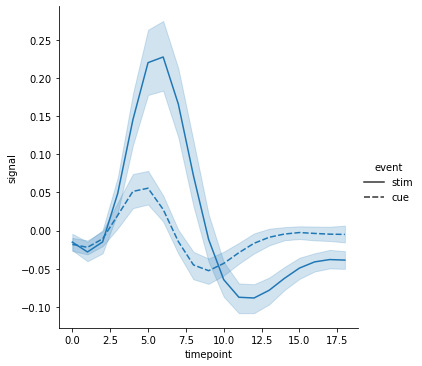

In [11]:
#
# Separación por clases usando style
#
sns.relplot(
    x="timepoint",
    y="signal",
    style="event",
    kind="line",
    data=fmri,
)
plt.show()

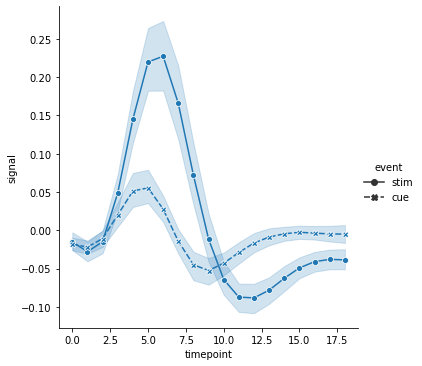

In [12]:
#
# Separación por clases usando marcadores y linea.
#
sns.relplot(
    x="timepoint",
    y="signal",
    style="event",
    markers=True,
    kind="line",
    data=fmri,
)
plt.show()

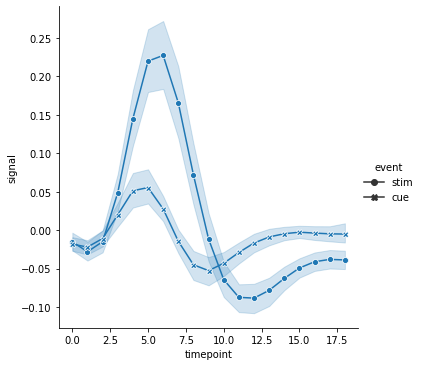

In [13]:
#
# Separación por clases usando solot marcadores.
#
sns.relplot(
    x="timepoint",
    y="signal",
    style="event",
    markers=True,
    dashes=False,
    kind="line",
    data=fmri,
)
plt.show()

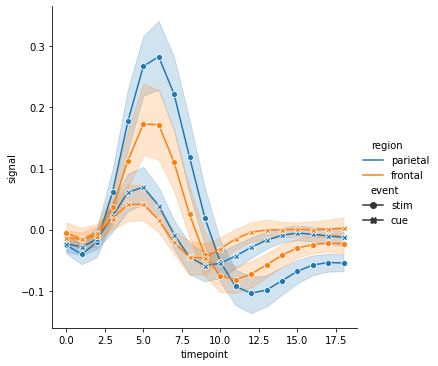

In [14]:
#
# Separación basada en multiples elementos.
#
sns.relplot(
    x="timepoint",
    y="signal",
    hue="region",
    style="event",
    dashes=False,
    markers=True,
    kind="line",
    data=fmri,
)
plt.show()

In [15]:
#
# Nuevo dataset de ejemplo
#
dots = sns.load_dataset("dots").query("align == 'dots'")

display(
    dots.head(),
    dots.tail(),
    dots.size
)

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

align choice  time  coherence  firing_rate
389  dots     T2   680        3.2    37.806267
390  dots     T2   700        0.0    43.464959
391  dots     T2   700        3.2    38.994559
392  dots     T2   720        0.0    41.987121
393  dots     T2   720        3.2    41.716057

1970

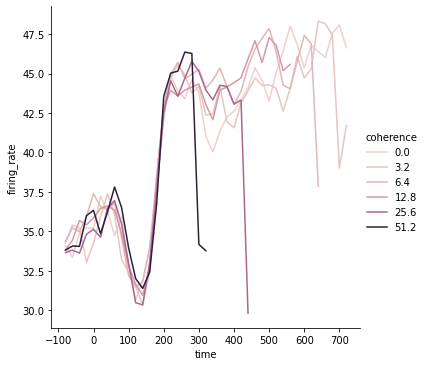

In [16]:
#
# Color basado en una columna numérica.
#
sns.relplot(
    x="time",
    y="firing_rate",
    hue="coherence",
#    style="choice",
    kind="line",
    data=dots,
    ci=None,
)

plt.show()

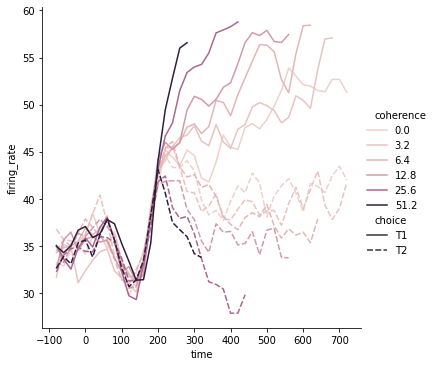

In [17]:
#
# Color basado en una columna numérica y 
# separación por clases. Note que el esquema de
# colores es lineal y no permite visualizar bien 
# las diferencias.
#
sns.relplot(
    x="time",
    y="firing_rate",
    hue="coherence",
    style="choice",
    kind="line",
    data=dots,
    ci=None,
)
plt.show()

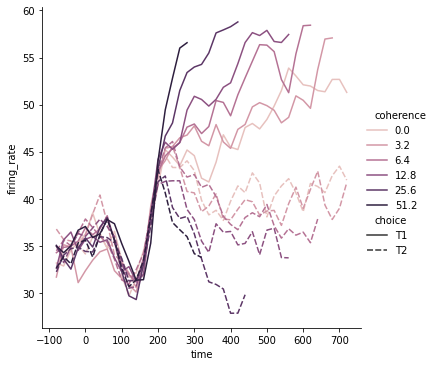

In [18]:
#
# Definición de una escala logaritmica para los
# colores
#
palette = sns.cubehelix_palette(
    light=0.8,
    n_colors=6,
)

sns.relplot(
    x="time",
    y="firing_rate",
    hue="coherence",
    style="choice",
    palette=palette,
    kind="line",
    data=dots,
)

plt.show()

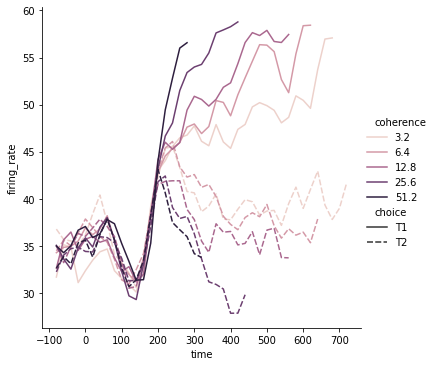

In [19]:
#
# Alternativa: modificación de la forma de
# normalizar la paleta de colores
#
from matplotlib.colors import LogNorm

palette = sns.cubehelix_palette(
    light=0.7,
    n_colors=6,
)

sns.relplot(
    x="time",
    y="firing_rate",
    hue="coherence",
    style="choice",
    hue_norm=LogNorm(),
    kind="line",
    data=dots.query("coherence > 0"),
)

plt.show()

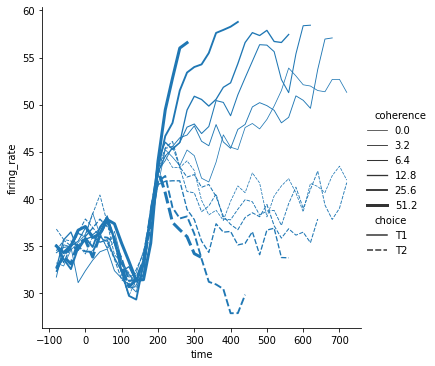

In [20]:
#
# Cambio del grosor de las líneas usando una
# columna numérica
#
sns.relplot(
    x="time",
    y="firing_rate",
    size="coherence",
    style="choice",
    kind="line",
    data=dots,
)

plt.show()

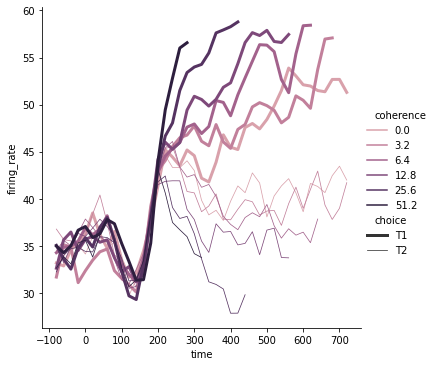

In [21]:
#
# Cambio del grosor de las líneas usando una
# columna categórica
#
sns.relplot(
    x="time",
    y="firing_rate",
    hue="coherence",
    size="choice",
    palette=palette,
    kind="line",
    data=dots,
)
plt.show()